### Masive Data Assignment
 (second project)
Read, Clean, and prepare the Data

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### ethereum_price

#### 1. Read the Data

In [14]:
# Read Bitcoin Cash Price
df = pd.read_csv('../data/raw/ethereum_price.csv', parse_dates = ['Date'])
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-09-05,297.57,318.57,268.29,312.99,"1,551,050,000","28,100,000,000"
1,2017-09-04,347.13,347.13,279.94,295.17,"1,801,690,000","32,774,000,000"
2,2017-09-03,350.23,366.49,332.23,347.48,"986,266,000","33,059,800,000"
3,2017-09-02,387.82,389.35,328.10,348.98,"1,483,600,000","36,601,200,000"
4,2017-09-01,383.47,390.04,383.47,387.74,"874,222,000","36,182,900,000"


In [15]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [16]:
df.count()

Date          761
Open          761
High          761
Low           761
Close         761
Volume        761
Market Cap    761
dtype: int64

as we can see we have in this file 7 columns and each column has 761 cells

In [17]:
df.describe()

,Open,High,Low,Close
count,761.000000,761.000000,761.000000,761.000000
mean,49.895319,52.372998,47.483389,50.287726
std,94.701419,99.021937,90.028103,95.157500
min,0.431589,0.482988,0.420897,0.434829
25%,4.360000,4.770000,4.030000,4.400000
50%,11.110000,11.340000,10.750000,11.080000
75%,17.360000,18.880000,16.370000,17.600000
max,397.590000,414.760000,383.470000,401.490000


In [18]:
# General Information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 7 columns):
Date          761 non-null datetime64[ns]
Open          761 non-null float64
High          761 non-null float64
Low           761 non-null float64
Close         761 non-null float64
Volume        761 non-null object
Market Cap    761 non-null object
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 41.7+ KB


In [19]:
#check if the dataset is duplicated
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
756    False
757    False
758    False
759    False
760    False
Length: 761, dtype: bool

as we can see the data fram has 7 columns. each column has 761 cell, and there is no missing data, 
* Volume and Market cap data type are object, we have to convert them to number. 

In [20]:
# Count missing data in each column
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

we can see there is no missing data 

#### 2. Cleaning Data

as i mentioned before the "Volume and Market Cap" have different format and python concedered that as a string not number, also we have some missing data in the Market Cap column 
so we have to convert all strings into number and 
     

In [33]:
print('Volume Data Type :', type(df.Volume[0]))
print('Market Cap Data Type :', type(df['Market Cap'][0]))

Volume Data Type : <class 'numpy.int64'>
Market Cap Data Type : <class 'int'>


In [34]:
# If Volume is equal to '-' convert it to 0
df.loc[df['Market Cap']=="-",'Market Cap']=0

In [36]:
def convert_to_number(x):
    try:
        return int(x.replace(',',''))
    except:
        return x

df.Volume = df.Volume.apply(convert_to_number)
df['Market Cap'] = df['Market Cap'].apply(lambda x: float(str(x).replace(',','')))

df.describe()

,Open,High,Low,Close,Volume,Market Cap
count,761.000000,761.000000,761.000000,761.000000,7.610000e+02,7.610000e+02
mean,49.895319,52.372998,47.483389,50.287726,1.776451e+08,4.579036e+09
std,94.701419,99.021937,90.028103,95.157500,4.208592e+08,8.861143e+09
min,0.431589,0.482988,0.420897,0.434829,1.021280e+05,0.000000e+00
25%,4.360000,4.770000,4.030000,4.400000,5.173420e+06,3.365720e+08
50%,11.110000,11.340000,10.750000,11.080000,1.397150e+07,9.274150e+08
75%,17.360000,18.880000,16.370000,17.600000,5.558060e+07,1.488420e+09
max,397.590000,414.760000,383.470000,401.490000,2.882650e+09,3.676160e+10


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 7 columns):
Date          761 non-null datetime64[ns]
Open          761 non-null float64
High          761 non-null float64
Low           761 non-null float64
Close         761 non-null float64
Volume        761 non-null int64
Market Cap    761 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 41.7 KB


In [39]:
df[df['Market Cap'].isnull()].head()

,Date,Open,High,Low,Close,Volume,Market Cap


In [41]:
# correlation between columns
correlation = df.corr(method="pearson")
correlation

,Open,High,Low,Close,Volume,Market Cap
Open,1.000000,0.998076,0.997908,0.997073,0.859138,0.999940
High,0.998076,1.000000,0.996977,0.998884,0.876642,0.997922
Low,0.997908,0.996977,1.000000,0.998015,0.844760,0.997927
Close,0.997073,0.998884,0.998015,1.000000,0.867768,0.996971
Volume,0.859138,0.876642,0.844760,0.867768,1.000000,0.858978
Market Cap,0.999940,0.997922,0.997927,0.996971,0.858978,1.000000


let's plot data between Market Cap and other variable, then see the relation between the data


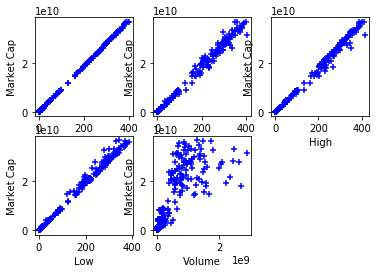

In [42]:
import matplotlib.pyplot as plt
def plot_data(xdata,ydata,xlabel):
    plt.scatter(xdata,ydata,marker='+',color='blue')
    plt.ylabel('Market Cap')
    plt.xlabel(xlabel)
        
plt.subplot(2,3,1)
plot_data(df.Open, df['Market Cap'],'Open')
plt.subplot(2,3,2)
plot_data(df.Close, df['Market Cap'],'Close')
plt.subplot(2,3,3)
plot_data(df.High, df['Market Cap'],'High')
plt.subplot(2,3,4)
plot_data(df.Low, df['Market Cap'],'Low')
plt.subplot(2,3,5)
plot_data(df.Volume, df['Market Cap'],'Volume')

In [43]:
from sklearn import linear_model

model       = linear_model.LinearRegression()
Open        = df[['Open']]
Market_Cap  = df['Market Cap']

In [44]:
# train data using linear regression 
model.fit(Open, Market_Cap)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
# Model Score
model.score(Open, Market_Cap)

0.9998799693892112

#### 4. Data Visualization

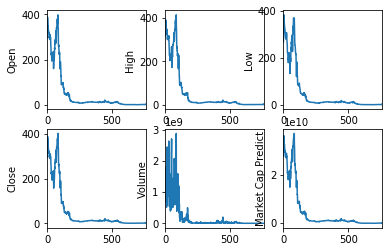

In [48]:
%matplotlib inline
    
plt.subplot(2,3,1)
plt.ylabel('Open')
df.Open.plot()

plt.subplot(2,3,2)
plt.ylabel('High')
df.High.plot()

plt.subplot(2,3,3)
plt.ylabel('Low')
df.Low.plot()

plt.subplot(2,3,4)
plt.ylabel('Close')
df.Close.plot()

plt.subplot(2,3,5)
plt.ylabel('Volume')
df.Volume.plot()

plt.subplot(2,3,6)
plt.ylabel('Market Cap Predict')
df['Market Cap Predict'].plot()